<a href="https://colab.research.google.com/github/AanchalSati/ANPR_ATCC_Smart_Traffic_Management/blob/main/STMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python-headless easyocr torch torchvision matplotlib
!pip install ultralytics  # For YOLOv8


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 23.6 MB/s eta 0:00:00



0: 576x640 2 cars, 1 truck, 10.7ms
Speed: 4.0ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


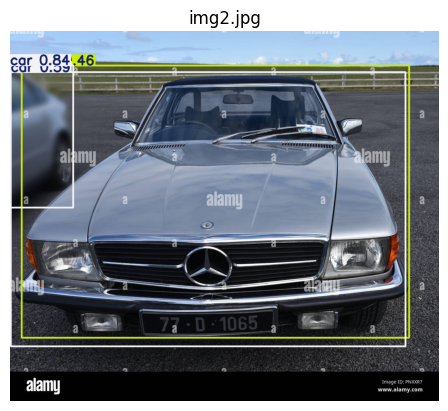


0: 480x640 6 persons, 6 cars, 3 trucks, 1 traffic light, 1 handbag, 42.9ms
Speed: 3.6ms preprocess, 42.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


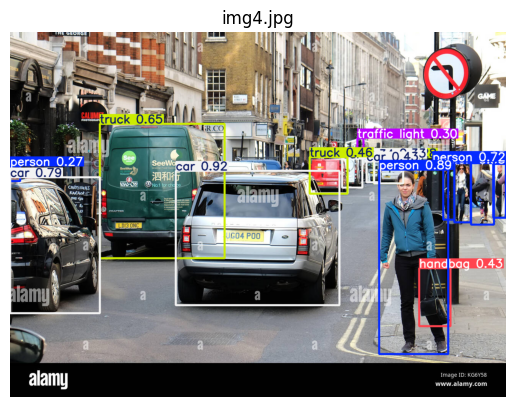


0: 640x416 1 car, 98.3ms
Speed: 3.9ms preprocess, 98.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


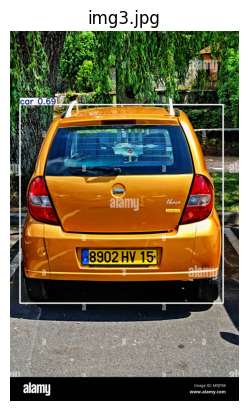


0: 480x640 1 person, 2 cars, 10.6ms
Speed: 4.2ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


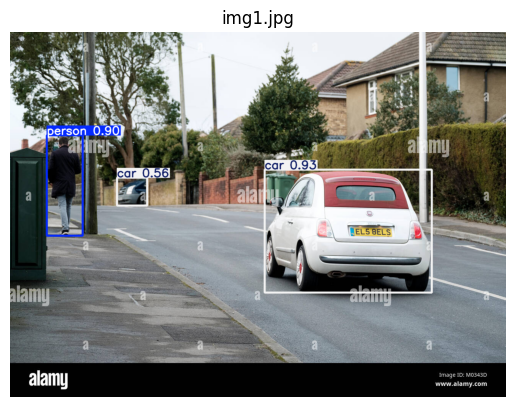

In [ ]:
import os

# Set the folder path
folder_path = "/content/drive/MyDrive/DATA"

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Folder path
folder_path = "/content/drive/My Drive/DATA"

# Loop through images
for file_name in os.listdir(folder_path):
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        file_path = os.path.join(folder_path, file_name)

        # Read the image
        image = cv2.imread(file_path)
        results = model(image)

        # Get the annotated frame
        annotated_image = results[0].plot()  # Use the first result for the image

        # Display using Matplotlib
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(file_name)
        plt.show()



In [ ]:
vehicle_classes = [2, 3, 5, 7]  # Example class IDs for vehicles (YOLO COCO classes)

for file_name in os.listdir(folder_path):
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        file_path = os.path.join(folder_path, file_name)
        image = cv2.imread(file_path)
        results = model(image)

        vehicle_count = {cls: 0 for cls in vehicle_classes}  # Initialize counters

        # Count vehicles
        for result in results:
            for box in result.boxes:
                cls = int(box.cls)
                if cls in vehicle_classes:
                    vehicle_count[cls] += 1

        print(f"Vehicle Count for {file_name}: {vehicle_count}")



0: 576x640 2 cars, 1 truck, 12.9ms
Speed: 5.9ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)
Vehicle Count for img2.jpg: {2: 2, 3: 0, 5: 0, 7: 1}

0: 480x640 6 persons, 6 cars, 3 trucks, 1 traffic light, 1 handbag, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Vehicle Count for img4.jpg: {2: 6, 3: 0, 5: 0, 7: 3}

0: 640x416 1 car, 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Vehicle Count for img3.jpg: {2: 1, 3: 0, 5: 0, 7: 0}

0: 480x640 1 person, 2 cars, 7.2ms
Speed: 3.3ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Vehicle Count for img1.jpg: {2: 2, 3: 0, 5: 0, 7: 0}
